On June 19, 2018, Public Source published an article called [Allegheny County plans to ramp up its efforts to make the air less stinky](https://www.publicsource.org/allegheny-county-plans-to-ramp-up-its-efforts-to-make-the-air-less-stinky), describing the air-quality problem posed by hydrogen sulfide in Allegheny County and the announcement by the deputy director of environmental health for Allegheny County that new regulations are in the works.

This notebook will explore the Daily Air Quality Data for Allegheny County published to [a repository on the Western Pennsylvania Regional Data Center](https://data.wprdc.org/dataset/allegheny-county-air-quality), showing how to filter down to just the hydrodgen sulfide readings.

In [1]:
import ckanapi
from pprint import pprint

site = "https://data.wprdc.org"

def get_resource_data(site,resource_id,count=50):
    # Use the datastore_search API endpoint to get <count> records from
    # a CKAN resource.
    ckan = ckanapi.RemoteCKAN(site)
    response = ckan.action.datastore_search(id=resource_id, limit=count)

    # A typical response is a dictionary like this
    #{u'_links': {u'next': u'/api/action/datastore_search?offset=3',
    #             u'start': u'/api/action/datastore_search'},
    # u'fields': [{u'id': u'_id', u'type': u'int4'},
    #             {u'id': u'pin', u'type': u'text'},
    #             {u'id': u'number', u'type': u'int4'},
    #             {u'id': u'total_amount', u'type': u'float8'}],
    # u'limit': 3,
    # u'records': [{u'_id': 1,
    #               u'number': 11,
    #               u'pin': u'0001B00010000000',
    #               u'total_amount': 13585.47},
    #              {u'_id': 2,
    #               u'number': 2,
    #               u'pin': u'0001C00058000000',
    #               u'total_amount': 7827.64},
    #              {u'_id': 3,
    #               u'number': 1,
    #               u'pin': u'0001C01661006700',
    #               u'total_amount': 3233.59}],
    # u'resource_id': u'd1e80180-5b2e-4dab-8ec3-be621628649e',
    # u'total': 88232}
    print("There are {} records in this resource.".format(response['total']))
    data = response['records']
    if len(data) < response['total']:
        print("Your request only got {} of them.".format(len(data)))
    return data

In [2]:
daily_air_quality_resource_id = "967f1285-f8fb-4785-9673-64a8ae47588d"
data = get_resource_data(site,daily_air_quality_resource_id,count=1000) # Get the first 1000 records as sample to examine.

There are 60810 records in this resource.
Your request only got 1000 of them.


Load the air quality data sample into a Pandas dataframe to make it easier to examine.

In [3]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
df = pd.DataFrame(data)

Display the dataframe:

In [4]:
df

,_id,bcstat,bcstat_txt,bp,bp_txt,co,co_txt,datetime,h2s,h2s_txt,int_t,int_t_txt,no,no2,no2_txt,no_txt,nox,nox_txt,noy,noy_txt,noydif,noydif_txt,out_rh,out_rh_txt,out_t,out_t_txt,ozone,ozone2,ozone2_txt,ozone_txt,per_f,per_f2,per_f2_txt,per_f_txt,pm10,pm10_fl,pm10_fl_txt,pm10_txt,pm10b,pm10b_txt,pm25(2),pm25(2)_txt,pm25_fl,pm25_fl_txt,pm25b,pm25b_txt,pm25t,pm25t_txt,rainfall,rainfall_txt,rwd,rwd_txt,rws,rws_txt,sigtheta,sigtheta_txt,site,so2,so2_txt,solarrad,solarrad_txt,sonicwd,sonicwd_txt,sonicws,sonicws_txt,stat,uv_rad,uv_rad_txt,uvpm,uvpm_txt
0,1,NaN,None,24.0,None,NaN,None,2016-01-15T00:00:00,24.0,None,24.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,None,None,None,NaN,None,NaN,None,24.0,None,Avalon,24.000,None,None,None,24.0,None,24.0,None,Count,None,None,NaN,None
1,2,NaN,None,NaN,None,NaN,None,2016-01-15T00:00:00,NaN,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,Avalon,NaN,None,None,None,NaN,None,NaN,None,Total,None,None,NaN,None
2,3,NaN,None,NaN,None,NaN,None,2016-01-30T00:00:00,NaN,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,Avalon,NaN,None,None,None,NaN,None,NaN,None,Total,None,None,NaN,None
3,4,NaN,None,726.8,None,NaN,None,2016-01-15T00:00:00,0.0,None,24.1,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,0.5,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,2.0,None,NaN,None,None,None,NaN,None,NaN,None,12.4,None,Avalon,0.000,None,None,None,6.0,None,1.5,None,Min,None,None,NaN,None
4,5,NaN,None,736.4,None,NaN,None,2016-01-15T00:00:00,0.0,None,25.8,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,10.1,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,19.0,None,NaN,None,None,None,NaN,None,NaN,None,56.1,None,Avalon,0.003,None,None,None,192.0,None,6.5,None,Max,None,None,NaN,None
5,6,NaN,None,NaN,None,22.0,None,2016-02-16T00:00:00,NaN,None,24.0,None,21.000,NaN,None,None,NaN,None,21.0,None,21.0,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,Lawrenceville 2,22.000,None,None,None,NaN,None,NaN,None,Count,None,None,NaN,None
6,7,NaN,None,3.0,None,NaN,None,2016-01-15T00:00:00,23.0,None,8.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,14.0,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,17.0,None,NaN,None,None,None,NaN,None,NaN,None,7.0,None,Avalon,17.000,None,None,None,19.0,None,20.0,None,Hr. of Max,None,None,NaN,None
7,8,NaN,None,732.1,None,NaN,None,2016-01-15T00:00:00,0.0,None,25.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,5.4,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,11.0,None,NaN,None,None,None,NaN,None,NaN,None,30.1,None,Avalon,0.000,None,None,None,125.0,None,2.8,None,Avg,None,None,NaN,None
8,9,NaN,None,24.0,None,NaN,None,2016-01-16T00:00:00,24.0,None,24.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,None,None,None,NaN,None,NaN,None,24.0,None,Avalon,24.000,None,None,None,24.0,None,24.0,None,Count,None,None,NaN,None
9,10,NaN,None,NaN,None,NaN,None,2016-01-16T00:00:00,NaN,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,Avalon,NaN,None,None,None,NaN,None,NaN,None,Total,None,None,NaN,None


Unfortunately, this buries the columns we're interested in, partially because of Panda's arrangement of them by alphabetical order.

In [5]:
def move_to_front(cols,field):
    """Move the named field to the beginning of the list of columns."""
    cols.insert(0, cols.pop(cols.index(field)))

# Get a list of the columns.
cols = list(df)
move_to_front(cols,'h2s') # The measurement we've decided to focus on.
move_to_front(cols,'stat') # This field is really important in making sense of this dataset.
move_to_front(cols,'datetime')
move_to_front(cols,'site')
df = df.loc[:, cols]
df = df.sort_values(['datetime','site']) # Sort the dataframe, first by datetime, and then by the site of the air measurements.
df


,site,datetime,stat,h2s,_id,bcstat,bcstat_txt,bp,bp_txt,co,co_txt,h2s_txt,int_t,int_t_txt,no,no2,no2_txt,no_txt,nox,nox_txt,noy,noy_txt,noydif,noydif_txt,out_rh,out_rh_txt,out_t,out_t_txt,ozone,ozone2,ozone2_txt,ozone_txt,per_f,per_f2,per_f2_txt,per_f_txt,pm10,pm10_fl,pm10_fl_txt,pm10_txt,pm10b,pm10b_txt,pm25(2),pm25(2)_txt,pm25_fl,pm25_fl_txt,pm25b,pm25b_txt,pm25t,pm25t_txt,rainfall,rainfall_txt,rwd,rwd_txt,rws,rws_txt,sigtheta,sigtheta_txt,so2,so2_txt,solarrad,solarrad_txt,sonicwd,sonicwd_txt,sonicws,sonicws_txt,uv_rad,uv_rad_txt,uvpm,uvpm_txt
0,Avalon,2016-01-15T00:00:00,Count,24.0,1,NaN,None,24.0,None,NaN,None,None,24.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,None,None,None,NaN,None,NaN,None,24.0,None,24.000,None,None,None,24.0,None,24.0,None,None,None,NaN,None
1,Avalon,2016-01-15T00:00:00,Total,NaN,2,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,None,None,NaN,None
3,Avalon,2016-01-15T00:00:00,Min,0.0,4,NaN,None,726.8,None,NaN,None,None,24.1,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,0.5,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,2.0,None,NaN,None,None,None,NaN,None,NaN,None,12.4,None,0.000,None,None,None,6.0,None,1.5,None,None,None,NaN,None
4,Avalon,2016-01-15T00:00:00,Max,0.0,5,NaN,None,736.4,None,NaN,None,None,25.8,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,10.1,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,19.0,None,NaN,None,None,None,NaN,None,NaN,None,56.1,None,0.003,None,None,None,192.0,None,6.5,None,None,None,NaN,None
6,Avalon,2016-01-15T00:00:00,Hr. of Max,23.0,7,NaN,None,3.0,None,NaN,None,None,8.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,14.0,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,17.0,None,NaN,None,None,None,NaN,None,NaN,None,7.0,None,17.000,None,None,None,19.0,None,20.0,None,None,None,NaN,None
7,Avalon,2016-01-15T00:00:00,Avg,0.0,8,NaN,None,732.1,None,NaN,None,None,25.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,5.4,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,11.0,None,NaN,None,None,None,NaN,None,NaN,None,30.1,None,0.000,None,None,None,125.0,None,2.8,None,None,None,NaN,None
44,Flag Plaza,2016-01-15T00:00:00,Count,NaN,45,NaN,None,NaN,None,24.0,None,None,24.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,24.0,None,NaN,NaN,None,None,24.0,NaN,None,None,24.0,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,None,None,NaN,None
45,Flag Plaza,2016-01-15T00:00:00,Total,NaN,46,NaN,None,NaN,None,NaN,None,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,None,None,NaN,None
46,Flag Plaza,2016-01-15T00:00:00,Min,NaN,47,NaN,None,NaN,None,0.1,None,None,22.0,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,1.9,None,NaN,NaN,None,None,50.0,NaN,None,None,6.0,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,None,None,NaN,None
47,Flag Plaza,2016-01-15T00:00:00,Max,NaN,48,NaN,None,NaN,None,0.7,None,None,22.5,None,NaN,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,10.7,None,NaN,NaN,None,None,52.0,NaN,None,None,68.0,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,None,None,NaN,None


This dataframe is being truncated in length because Pandas defaults to constraining the number of rows to 60 rows:

In [6]:
pd.options.display.max_rows

60

We can temporarily change this, so we can scroll through all 1000 rows.

In [7]:
pd.options.display.max_rows = 1000
df.loc[:,cols[:4]]

,site,datetime,stat,h2s
0,Avalon,2016-01-15T00:00:00,Count,24.000
1,Avalon,2016-01-15T00:00:00,Total,NaN
3,Avalon,2016-01-15T00:00:00,Min,0.000
4,Avalon,2016-01-15T00:00:00,Max,0.000
6,Avalon,2016-01-15T00:00:00,Hr. of Max,23.000
7,Avalon,2016-01-15T00:00:00,Avg,0.000
44,Flag Plaza,2016-01-15T00:00:00,Count,NaN
45,Flag Plaza,2016-01-15T00:00:00,Total,NaN
46,Flag Plaza,2016-01-15T00:00:00,Min,NaN
47,Flag Plaza,2016-01-15T00:00:00,Max,NaN


Most of the stations only have NaN values for the hydrogen sulfide measurement (the 'h2s' column). We're only interested in the two stations that measure hydrogen sulfide: Avalon and Liberty.

### An aside about long-formatted data vs. wide-formatted data

Note that this data is in what is called "long" format, where different values ("Count", "Total", "Min", "Max", "Hr. of Max" and "Avg") have been specified in the stat column, stretching the information about one day's measurements at a given station over six different rows. 

The opposite of "long" format is "wide" format. To convert from long format to wide format, we can use the pivot_table function:

In [8]:
pd.pivot_table(df.loc[:,cols[:4]], index=['site','datetime'], columns=['stat'])

h2s                          \
stat                                            Avg Count Hr. of Max    Max   
site                     datetime                                             
Avalon                   2016-01-15T00:00:00  0.000  24.0       23.0  0.000   
                         2016-01-16T00:00:00  0.000  24.0       23.0  0.000   
                         2016-01-17T00:00:00  0.000  24.0       23.0  0.000   
                         2016-01-18T00:00:00  0.000  24.0       23.0  0.000   
                         2016-01-19T00:00:00  0.000  24.0       23.0  0.000   
                         2016-01-20T00:00:00  0.000  23.0       15.0  0.001   
                         2016-01-21T00:00:00  0.000  15.0       11.0  0.001   
                         2016-01-29T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-30T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-31T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-01T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-02T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-03T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-04T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-05T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-06T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-07T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-08T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-09T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-10T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-11T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-12T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-13T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-14T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-15T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-16T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-17T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-18T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-19T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-20T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-23T00:00:00    NaN   0.0        NaN    NaN   
Flag Plaza               2016-01-15T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-16T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-17T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-18T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-19T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-20T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-21T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-29T00:00:00    NaN   NaN        NaN    NaN   
                         2016-01-31T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-01T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-02T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-04T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-06T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-07T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-08T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-09T00:00:00    NaN   NaN        NaN    NaN   
                         2016-02-10T00:00:00    NaN   NaN        NaN    NaN   
                   

To convert from wide format to long format, you can use the melt function.

### ... back to the main analysis

To just get the maximum hydrogen sulfide concentrations for each day, we could use the wide-format and pick out the 'Max' column, but we don't need to do that, as it's easier to just select rows in the original dataframe where stat == 'Max'.

In [9]:
pd.options.display.max_rows = 300
df.loc[df['stat']=='Max',cols[:4]]

,site,datetime,stat,h2s
4,Avalon,2016-01-15T00:00:00,Max,0.000
47,Flag Plaza,2016-01-15T00:00:00,Max,NaN
93,Glassport High Street,2016-01-15T00:00:00,Max,NaN
139,Harrison Township,2016-01-15T00:00:00,Max,NaN
188,Lawrenceville,2016-01-15T00:00:00,Max,NaN
280,Lawrenceville 2,2016-01-15T00:00:00,Max,NaN
324,Liberty,2016-01-15T00:00:00,Max,0.021
378,Liberty 2,2016-01-15T00:00:00,Max,NaN
428,Lincoln,2016-01-15T00:00:00,Max,NaN
509,North Braddock,2016-01-15T00:00:00,Max,NaN


Let's also limit the data to the Liberty and Avalon stations.

In [10]:
df.loc[(df['stat']=='Max') & (df['site'].isin(['Avalon','Liberty'])),cols[:4]]

,site,datetime,stat,h2s
4,Avalon,2016-01-15T00:00:00,Max,0.000
324,Liberty,2016-01-15T00:00:00,Max,0.021
11,Avalon,2016-01-16T00:00:00,Max,0.000
336,Liberty,2016-01-16T00:00:00,Max,0.003
17,Avalon,2016-01-17T00:00:00,Max,0.000
342,Liberty,2016-01-17T00:00:00,Max,0.000
23,Avalon,2016-01-18T00:00:00,Max,0.000
348,Liberty,2016-01-18T00:00:00,Max,0.000
29,Avalon,2016-01-19T00:00:00,Max,0.000
358,Liberty,2016-01-19T00:00:00,Max,0.001


At this point, we could go back and fetch all the records from the CKAN data portal, and then run all the above sifting and sorting code again, but this particular resource seems to take a while to get fetched. So let's try a different approach and send a SQL query for the subset of data that we want.

In [11]:
def query_resource(site,query):
    # Use the datastore_search_sql API endpoint to query a CKAN resource.
    ckan = ckanapi.RemoteCKAN(site)
    response = ckan.action.datastore_search_sql(sql=query)
    # A typical response is a dictionary like this
    #{u'fields': [{u'id': u'_id', u'type': u'int4'},
    #             {u'id': u'_full_text', u'type': u'tsvector'},
    #             {u'id': u'pin', u'type': u'text'},
    #             {u'id': u'number', u'type': u'int4'},
    #             {u'id': u'total_amount', u'type': u'float8'}],
    # u'records': [{u'_full_text': u"'0001b00010000000':1 '11':2 '13585.47':3",
    #               u'_id': 1,
    #               u'number': 11,
    #               u'pin': u'0001B00010000000',
    #               u'total_amount': 13585.47},
    #              {u'_full_text': u"'0001c00058000000':3 '2':2 '7827.64':1",
    #               u'_id': 2,
    #               u'number': 2,
    #               u'pin': u'0001C00058000000',
    #               u'total_amount': 7827.64},
    #              {u'_full_text': u"'0001c01661006700':3 '1':1 '3233.59':2",
    #               u'_id': 3,
    #               u'number': 1,
    #               u'pin': u'0001C01661006700',
    #               u'total_amount': 3233.59}]
    # u'sql': u'SELECT * FROM "d1e80180-5b2e-4dab-8ec3-be621628649e" LIMIT 3'}
    data = response['records']
    return data

In [12]:
subset = query_resource(site,
    query="SELECT site, datetime, h2s FROM \"{}\" WHERE site in ('Avalon', 'Liberty') AND stat = 'Max' ORDER BY datetime, site".format(daily_air_quality_resource_id))
print(len(subset))
pprint(subset[:4])

1688
[{'datetime': '2016-01-15T00:00:00', 'h2s': 0.0, 'site': 'Avalon'},
 {'datetime': '2016-01-15T00:00:00', 'h2s': 0.021, 'site': 'Liberty'},
 {'datetime': '2016-01-16T00:00:00', 'h2s': 0.0, 'site': 'Avalon'},
 {'datetime': '2016-01-16T00:00:00', 'h2s': 0.003, 'site': 'Liberty'}]


OK, this looks good. Let's parse the datetime string into an actual datetime object.

In [13]:
from datetime import datetime
for row in subset:
    row['dt'] = datetime.strptime(row['datetime'],"%Y-%m-%dT%H:%M:%S")
    

In [14]:
dts_avalon = np.array([r['dt'] for r in subset if r['site']=='Avalon'])
days_avalon = np.array([(r['dt']-subset[0]['dt']).days for r in subset if r['site']=='Avalon'])
h2s_avalon = np.array([r['h2s'] for r in subset if r['site']=='Avalon'])
days_liberty = np.array([(r['dt']-subset[0]['dt']).days for r in subset if r['site']=='Liberty'])
h2s_liberty = np.array([r['h2s'] for r in subset if r['site']=='Liberty'])


In [15]:
df_h2s

NameError: name 'df_h2s' is not defined

According to [https://publiclab.org/wiki/hydrogen-sulfide-regulations](https://publiclab.org/wiki/hydrogen-sulfide-regulations), the legal hydrogen sulfide limits in the state of Pennsylania are as follows: "The 24-hour time weighted average limit for hydrogen sulfide is 0.005 ppm (5 ppb), and the 1-hour limit is 0.1 ppm (100 ppb)."  

According to [OSHA](https://www.osha.gov/SLTC/hydrogensulfide/hazards.html), concentrations of hydrogen sulfide in the range 0.01-1.5 parts per million are associated with the following effects: "Odor threshold (when rotten egg smell is first noticeable to some). Odor becomes more offensive at 3-5 ppm. Above 30 ppm, odor described as sweet or sickeningly sweet."

Below are plots of the hydrogen sulfide measurements from the Avalon and Liberty locations versus days since the first measurement. The Avalon plot (as of the time of this notebook) shows a maximum concentration of around 0.012 ppm, and the points appear to be separated into levels, presumably because of the resolution limit of the sensor.

In constrast, the Liberty sensor shows concentrations above 0.08 ppm, and the values seem high enough that whatever resolution the sensor has does not show up as discrete levels in the plot.

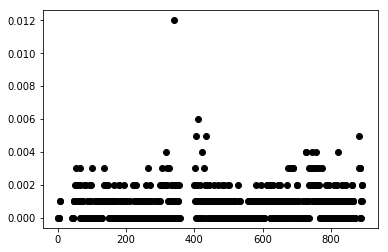

In [19]:
import matplotlib.pyplot as plt
plt.plot(days_avalon, h2s_avalon, 'o', color='black');

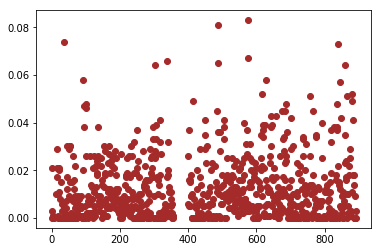

In [20]:
plt.plot(days_liberty, h2s_liberty, 'o', color='brown');

We can plot one set of readings against the other to get a sense of whether there's a strong correlation between them.

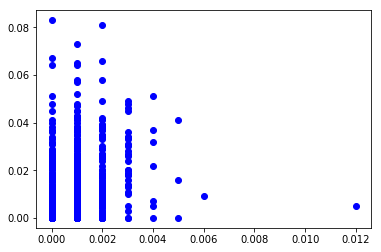

In [21]:
plt.plot(h2s_avalon, h2s_liberty, 'o', color='blue');

We can't calculate the correlation coefficient (using the numpy corrcoef method) of the hydrogen-sulfide readings from the two stations because there are None values in the lists. Let's make reduced lists that take out any day when either (or both) stations have None readings.

In [32]:
avalon = h2s_avalon[np.logical_and(h2s_avalon != np.array(None), h2s_liberty != np.array(None))]
liberty = h2s_liberty[np.logical_and(h2s_avalon != np.array(None), h2s_liberty != np.array(None))]


In [35]:
np.corrcoef(avalon.astype(float), liberty.astype(float))

array([[1.        , 0.24835489],
       [0.24835489, 1.        ]])

This is a small correlation, so a high hydrogen-sulfide concentration at one station does not automatically mean there will be a high concentration at the other station (about twenty miles away).

# A function to just get today's highest measurement

We'll conclude this notebook for now by writing a simple function that will let us get the highest hydrogen sulfide measurement from a particular station so far today.

In [38]:
station='Liberty'
subset = query_resource(site,
    query="SELECT site, datetime, h2s FROM \"{}\" WHERE site = '{}' AND stat = 'Max' ORDER BY datetime DESC LIMIT 2".format(daily_air_quality_resource_id,station))
# A query to get the location, datetime, and maximum hydrogen sulfide concentration for 
# the last two days (where "ORDER by datetime DESC" sets the ordering to be reverse chronological).

In [39]:
subset

[{'site': 'Liberty', 'h2s': 0.0, 'datetime': '2018-06-25T00:00:00'},
 {'site': 'Liberty', 'h2s': 0.003, 'datetime': '2018-06-24T00:00:00'}]

In [40]:
def max_h2s_so_far_today(station='Liberty'):
    subset = query_resource(site,
    query="SELECT site, datetime, h2s FROM \"{}\" WHERE site = '{}' AND stat = 'Max' ORDER BY datetime DESC LIMIT 1".format(daily_air_quality_resource_id,station))
    return subset[0]['h2s']

In [41]:
print(max_h2s_so_far_today(station='Liberty'))

0.0
